In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle competitions download -c dogs-vs-cats

 98% 799M/812M [00:08<00:00, 185MB/s]
100% 812M/812M [00:08<00:00, 96.7MB/s]


In [4]:
from zipfile import ZipFile
dataset = 'dogs-vs-cats.zip'
with ZipFile(dataset, 'r') as zip:
    zip.extractall()
    print("The dataset is extracted.")

The dataset is extracted.


In [5]:
from zipfile import ZipFile
dataset = '/content/train.zip'
with ZipFile(dataset, 'r') as zip:
    zip.extractall()
    print("The dataset is extracted.")

The dataset is extracted.


In [10]:
import os
path, dirs, files = next(os.walk('/content/train'))
file_count = len(files)
print("Number of images : ", file_count)

Number of images :  25000


In [11]:
import os
file_names = os.listdir('/content/train')
print(file_names)

['cat.9255.jpg', 'dog.5974.jpg', 'cat.8901.jpg', 'cat.9425.jpg', 'cat.4061.jpg', 'dog.8297.jpg', 'dog.985.jpg', 'dog.74.jpg', 'dog.4736.jpg', 'dog.8418.jpg', 'dog.9885.jpg', 'cat.594.jpg', 'dog.3344.jpg', 'cat.1481.jpg', 'cat.4884.jpg', 'dog.7108.jpg', 'cat.2486.jpg', 'cat.10168.jpg', 'cat.2741.jpg', 'cat.8161.jpg', 'dog.5334.jpg', 'dog.10663.jpg', 'dog.6999.jpg', 'dog.1301.jpg', 'cat.4134.jpg', 'cat.5562.jpg', 'cat.749.jpg', 'cat.3931.jpg', 'cat.4780.jpg', 'dog.3057.jpg', 'dog.10369.jpg', 'cat.6360.jpg', 'dog.6865.jpg', 'dog.9143.jpg', 'dog.4254.jpg', 'dog.7802.jpg', 'dog.8299.jpg', 'cat.1046.jpg', 'dog.4461.jpg', 'cat.7471.jpg', 'dog.4193.jpg', 'cat.8578.jpg', 'cat.5982.jpg', 'dog.4052.jpg', 'dog.3707.jpg', 'dog.2917.jpg', 'cat.9075.jpg', 'dog.9053.jpg', 'dog.10801.jpg', 'cat.12412.jpg', 'cat.4376.jpg', 'cat.9463.jpg', 'cat.734.jpg', 'cat.3862.jpg', 'dog.10352.jpg', 'dog.5277.jpg', 'cat.6493.jpg', 'dog.2021.jpg', 'cat.11337.jpg', 'dog.7254.jpg', 'cat.11187.jpg', 'cat.10424.jpg', 'dog

In [12]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

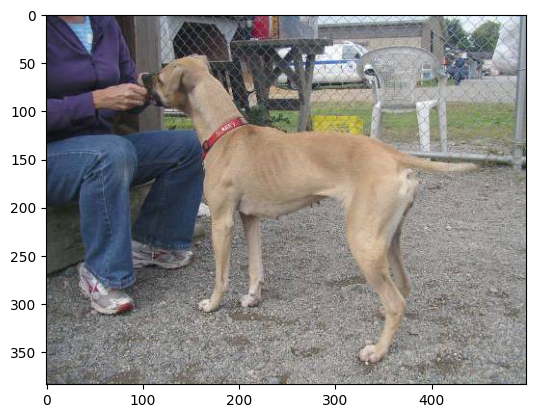

In [14]:
img = mpimg.imread('/content/train/dog.5974.jpg')
imgplot = plt.imshow(img)
plt.show()

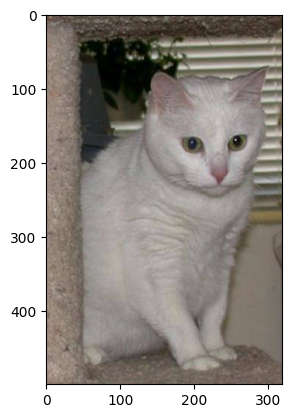

In [15]:
img = mpimg.imread('/content/train/cat.9425.jpg')
imgplot = plt.imshow(img)
plt.show()

In [19]:
dog_count = 0
cat_count = 0

for file in file_names:
    name = file[0:3]
    if name == 'dog':
        dog_count += 1
    else:
        cat_count += 1

print("Number of dog images : ", dog_count)
print("Number of cat images : ", cat_count)

Number of dog images :  12500
Number of cat images :  12500


In [20]:
os.mkdir('/content/image resized')

In [21]:
original_folder = '/content/train/'
resized_folder = '/content/image resized/'

for i in range(2000):
    filename = os.listdir(original_folder)[i]
    img_path = original_folder + filename

    img = Image.open(img_path)
    img = img.resize((224, 224))
    img = img.convert('RGB')

    newImgPath = resized_folder + filename
    img.save(newImgPath)

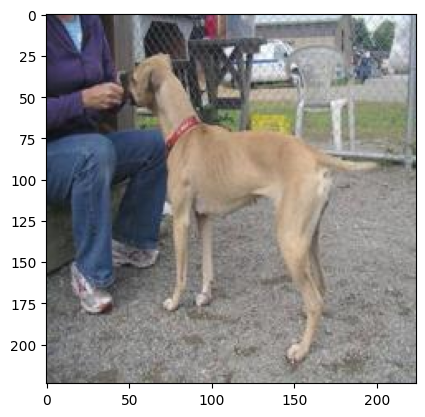

In [22]:
img = mpimg.imread('/content/image resized/dog.5974.jpg')
imgplot = plt.imshow(img)
plt.show()

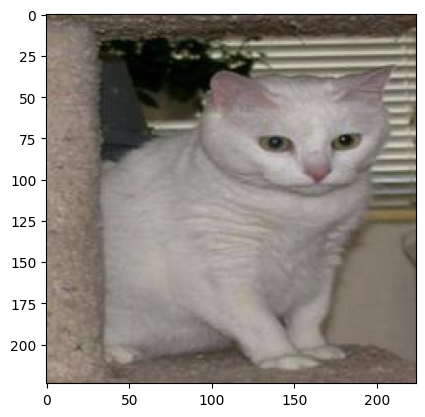

In [23]:
img = mpimg.imread('/content/image resized/cat.9425.jpg')
imgplot = plt.imshow(img)
plt.show()

In [24]:
labels = []
filenames = os.listdir('/content/image resized')

for i in range(2000):
    file_name = filenames[i]
    label = file_name[0:3]
    if label == 'dog':
        labels.append(1)
    else:
        labels.append(0)

In [25]:
print(filenames[0:5])

['cat.9255.jpg', 'dog.5974.jpg', 'cat.8901.jpg', 'cat.9425.jpg', 'cat.4061.jpg']


In [26]:
print(labels[0:5])

[0, 1, 0, 0, 0]


In [27]:
values, counts = np.unique(labels, return_counts = True)
print(values)
print(counts)

[0 1]
[1023  977]


In [29]:
import cv2
import glob

image_dir = '/content/image resized/'
image_extension = ['png', 'jpg']

files = []
[files.extend(glob.glob(image_dir + '*.' + e)) for e in image_extension]
dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [30]:
print(dog_cat_images)

[[[[  2   2   2]
   [  2   2   2]
   [  4   4   4]
   ...
   [  4   6   6]
   [  9  11  11]
   [  5   7   7]]

  [[  2   2   2]
   [  2   2   2]
   [  4   4   4]
   ...
   [  4   6   6]
   [  9  11  11]
   [  5   7   7]]

  [[  2   2   2]
   [  2   2   2]
   [  4   4   4]
   ...
   [  4   6   6]
   [  9  11  11]
   [  5   7   7]]

  ...

  [[  6   6   6]
   [  6   6   6]
   [  6   6   6]
   ...
   [ 75  77  78]
   [ 75  77  78]
   [ 75  77  78]]

  [[  4   4   4]
   [  5   5   5]
   [  5   5   5]
   ...
   [ 75  74  76]
   [ 73  72  74]
   [ 72  71  73]]

  [[  3   3   3]
   [  4   4   4]
   [  5   5   5]
   ...
   [ 85  84  86]
   [ 82  81  83]
   [ 79  78  80]]]


 [[[ 63  39  39]
   [ 59  38  37]
   [ 51  32  29]
   ...
   [157 139 128]
   [189 173 161]
   [179 163 151]]

  [[ 66  42  44]
   [ 65  44  43]
   [ 61  41  40]
   ...
   [160 144 132]
   [190 174 162]
   [179 163 151]]

  [[ 62  37  41]
   [ 66  44  46]
   [ 71  51  50]
   ...
   [160 144 132]
   [188 172 160]
   [175 161

In [33]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


In [34]:
x = dog_cat_images
y = np.asarray(labels)

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 2)

In [36]:
x_train_scaled = x_train / 255
x_test_scaled = x_test / 255

In [37]:
import tensorflow as tf
import tensorflow_hub as hub

In [39]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape = (224, 224, 3), trainable = False)

In [41]:
num_of_classes = 2

model = tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.Dense(2)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense_1 (Dense)             (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [42]:
model.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), metrics = ['acc'])

In [44]:
model.fit(x_train_scaled, y_train, epochs = 5)

Epoch 1/5
50/50 [==============================] - 39s 720ms/step - loss: 0.2127 - acc: 0.9119
Epoch 2/5
50/50 [==============================] - 39s 770ms/step - loss: 0.0698 - acc: 0.9800
Epoch 3/5
50/50 [==============================] - 35s 697ms/step - loss: 0.0521 - acc: 0.9831
Epoch 4/5
50/50 [==============================] - 35s 698ms/step - loss: 0.0370 - acc: 0.9862
Epoch 5/5
50/50 [==============================] - 34s 690ms/step - loss: 0.0303 - acc: 0.9944


In [45]:
score, acc = model.evaluate(x_test_scaled, y_test)
print("Test Loss: ", score)
print("Test Accuracy", acc)

13/13 [==============================] - 10s 628ms/step - loss: 0.0510 - acc: 0.9850
Test Loss:  0.051007967442274094
Test Accuracy 0.9850000143051147


Path of the image to be predicted : /content/cat.jpg


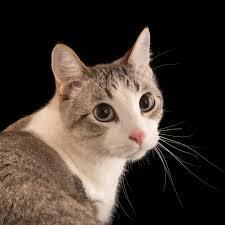

1/1 [==============================] - 0s 383ms/step
The image represents a cat.


In [46]:
input_image_path = input('Path of the image to be predicted : ')
input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)
input_image_resize = cv2.resize(input_image, (224, 224))
input_image_scaled = input_image_resize / 255
image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])
input_prediction = model.predict(image_reshaped)
input_pred_label = np.argmax(input_prediction)

if input_pred_label == 0:
    print("The image represents a cat.")
else:
    print("The image represents a dog.")


Path of the image to be predicted : /content/dog.jpg


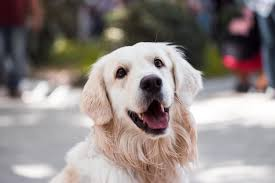

1/1 [==============================] - 0s 33ms/step
The image represents a dog.


In [47]:
input_image_path = input('Path of the image to be predicted : ')
input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)
input_image_resize = cv2.resize(input_image, (224, 224))
input_image_scaled = input_image_resize / 255
image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])
input_prediction = model.predict(image_reshaped)
input_pred_label = np.argmax(input_prediction)

if input_pred_label == 0:
    print("The image represents a cat.")
else:
    print("The image represents a dog.")
